In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart = pd.read_csv('D:\semester 6\data mining\TUBES\heart.csv') #data tentang penyakit jantung pada pasien
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

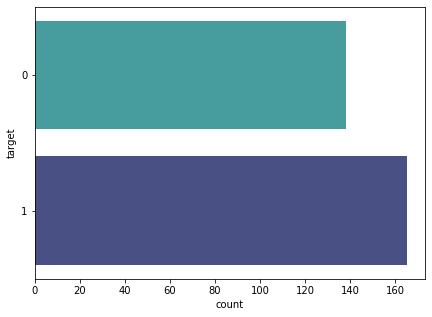

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y="target", data=heart, palette="mako_r");

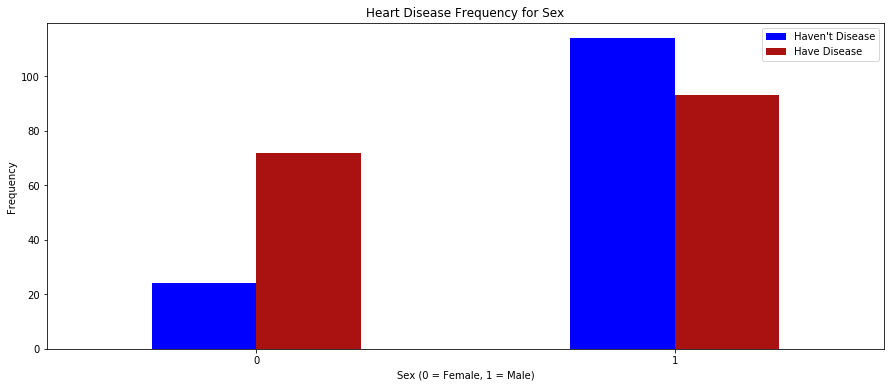

In [ ]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

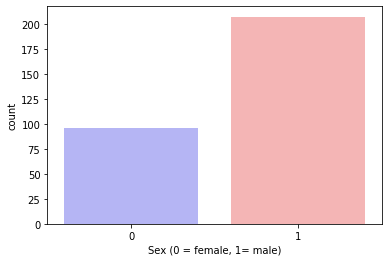

In [ ]:
sns.countplot(x='sex', data=heart, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

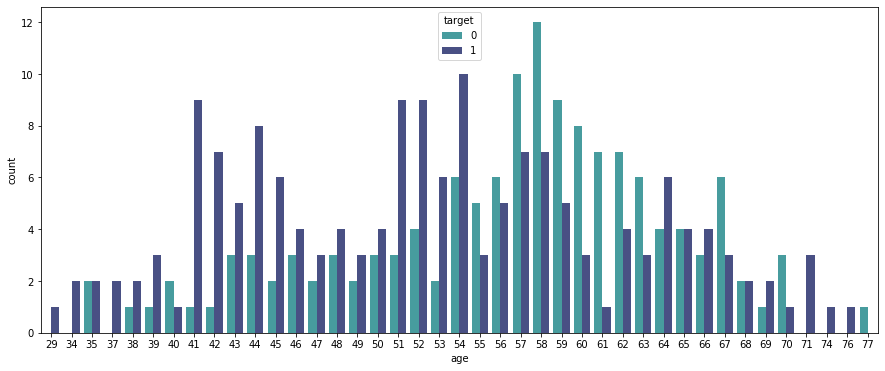

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = heart, hue = 'target',palette='mako_r')
plt.show()

In [ ]:
# Variabel independen
x = heart.drop(["target"], axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
# Variabel dependen
y = heart["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[28,  5],
       [ 3, 25]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(C=0.1, kernel='linear', probability=True)
clf.fit(x_train, y_train) 

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
yhat = clf.predict(x_test)
yhat

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[25,  8],
       [ 2, 26]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



# Discriminant

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
y_pr = lda.predict(x_test)
y_pr

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pr)

array([[25,  8],
       [ 2, 26]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1).fit(x_train, y_train)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pre = rf.predict(x_test)
y_pre

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pre))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pre))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pre)))

Mean Absolute Error: 0.18032786885245902
Mean Squared Error: 0.18032786885245902
Root Mean Squared Error: 0.4246502900652006


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))
print(accuracy_score(y_test, y_pre))

[[24  9]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61

0.819672131147541


# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=45)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predik = rf.predict(x_test)
y_predik

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predik)

array([[22,  1],
       [ 1, 37]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predik))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.97      0.97      0.97        38

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

